In [1]:
import torch
import numpy as np
from dptb.nn.dftb2nnsk import DFTB2NNSK
import matplotlib.pyplot as plt
from dptb.entrypoints.collectskf import skf2nnsk
from dptb.nn.build import build_model
from dptb.utils.tools import j_loader
from dptb.postprocess.bandstructure.band import Band
from dptb.nn.nnsk import NNSK
import json

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.


/root/dptb_venv/lib/python3.10/site-packages/torch/nested/__init__.py:107: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at ../aten/src/ATen/NestedTensorImpl.cpp:178.)
  return torch._nested_tensor_from_tensor_list(ts, dtype, None, device, None)


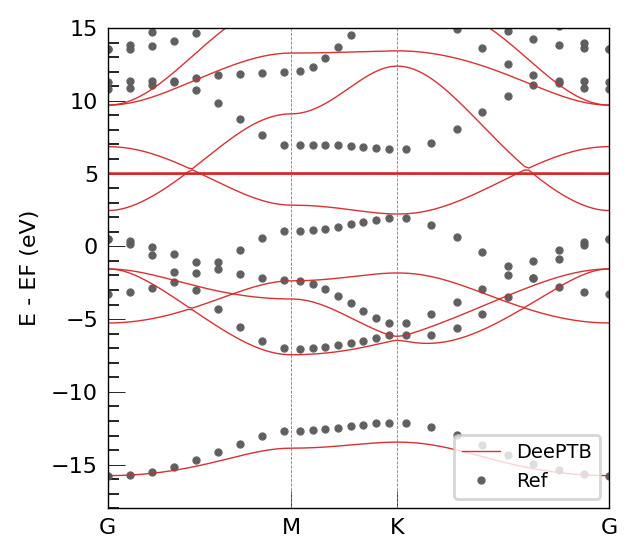

In [2]:
model = build_model('../../dptb/nn/dftb/base_poly2.pth',no_check=True)
# not the no_check=True, which is used to skip the check of the model options. 

stru_data = '../hBN_dftb/data/struct.vasp'
kpath_kwargs = {
        "task": "band",
        "kline_type":"abacus",
        "kpath":[
            [0, 0, 0, 50],
            [0.5, 0, 0, 50],
            [0.3333333, 0.3333333, 0, 50],
            [0, 0, 0, 1]
        ],
        "nel_atom":{"N":5,"B":3},
        "klabels":["G", "M", "K", "G"],
        "E_fermi":-12.798759460449219,
        "emin":-25,
        "emax":15,
        "ref_band": "../hBN_dftb/data/kpath.0/eigenvalues.npy"
    }
bcal = Band(model=model, 
            use_gui=False, 
            results_path='./', 
            device=model.device)
eigenstatus = bcal.get_bands(data=stru_data, 
               kpath_kwargs=kpath_kwargs)

bcal.band_plot(ref_band = kpath_kwargs["ref_band"],
               E_fermi = -5,
               emin = -18,
               emax = 15)

##  你会发现上面的能带怎么 在 5 eV 附近有一个平的带呢？这是因为我们默认的采用的轨道是spd。 对于 h-BN d orbital 全部为的所有hopping， onside 全部0 是无效信息。 
## 我们可以手动指定 轨道信息

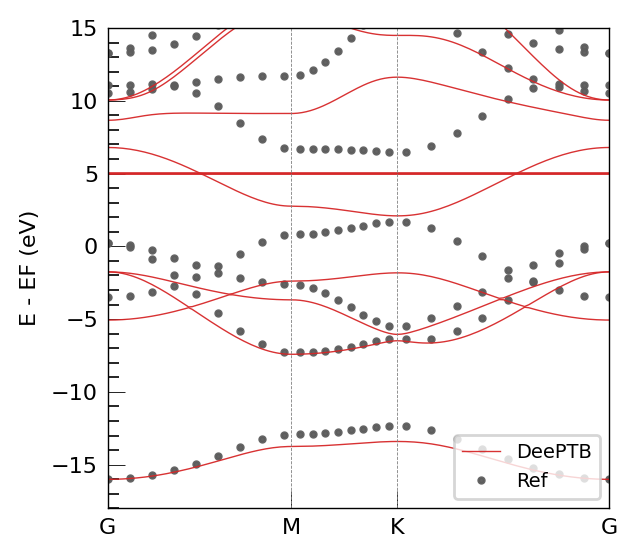

In [3]:
common_options = {
    "basis": {
        "B": ["s", "p", "d"],
        "N": ["s", "p", "d"],
    },
    "device": "cpu",
    "dtype": "float32",
    "overlap": True,
    "seed": 3982377700
}

model = build_model('../../dptb/nn/dftb/base_poly4.pth',common_options=common_options, no_check=True)
# not the no_check=True, which is used to skip the check of the model options. 
# AtomicData_options = {"r_max": 5.0,"er_max": 3.5, "oer_max":1.6, "pbc": True}
stru_data = '../hBN_dftb/data/struct.vasp'
kpath_kwargs = {
        "task": "band",
        "kline_type":"abacus",
        "kpath":[
            [0, 0, 0, 50],
            [0.5, 0, 0, 50],
            [0.3333333, 0.3333333, 0, 50],
            [0, 0, 0, 1]
        ],
        "nel_atom":{"N":5,"B":3},
        "klabels":["G", "M", "K", "G"],
        "E_fermi":-12.798759460449219,
        "emin":-25,
        "emax":15,
        "ref_band": "../hBN_dftb/data/kpath.0/eigenvalues.npy"
    }
bcal = Band(model=model, 
            use_gui=False, 
            results_path='./', 
            device=model.device)
eigenstatus = bcal.get_bands(data=stru_data, 
               kpath_kwargs=kpath_kwargs)

bcal.band_plot(ref_band = kpath_kwargs["ref_band"],
               E_fermi = -5,
               emin = -18,
               emax = 15)


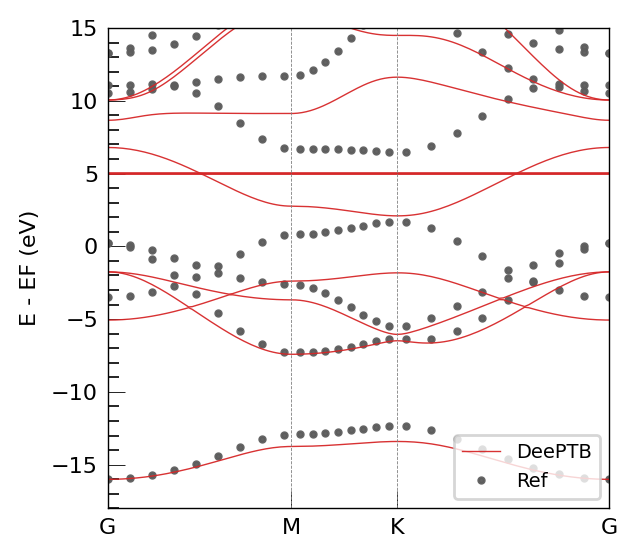

In [4]:
common_options = {
    "basis": {
        "B": ["s", "p", "d"],
        "N": ["s", "p", "d"],
    }
}

model = build_model('../../dptb/nn/dftb/base_poly4.pth',common_options=common_options, no_check=True)
# not the no_check=True, which is used to skip the check of the model options. 
# AtomicData_options = {"r_max": 5.0,"er_max": 3.5, "oer_max":1.6, "pbc": True}
stru_data = '../hBN_dftb/data/struct.vasp'
kpath_kwargs = {
        "task": "band",
        "kline_type":"abacus",
        "kpath":[
            [0, 0, 0, 50],
            [0.5, 0, 0, 50],
            [0.3333333, 0.3333333, 0, 50],
            [0, 0, 0, 1]
        ],
        "nel_atom":{"N":5,"B":3},
        "klabels":["G", "M", "K", "G"],
        "E_fermi":-12.798759460449219,
        "emin":-25,
        "emax":15,
        "ref_band": "../hBN_dftb/data/kpath.0/eigenvalues.npy"
    }
bcal = Band(model=model, 
            use_gui=False, 
            results_path='./', 
            device=model.device)
eigenstatus = bcal.get_bands(data=stru_data, 
               kpath_kwargs=kpath_kwargs)

bcal.band_plot(ref_band = kpath_kwargs["ref_band"],
               E_fermi = -5,
               emin = -18,
               emax = 15)
